In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Fact_Table_With_Corrected_Limits.csv', delimiter=',')
df = df.loc[:, ['Collection_point', 'Parametr', 'Hodnota']]
df

,Collection_point,Parametr,Hodnota
0,Adamov,barva,2.000
1,Adamov,Clostridium perfringens,0.000
2,Adamov,dusitany,0.014
3,Adamov,Escherichia coli,0.000
4,Adamov,CHSK-Mn,1.100
...,...,...,...
14143,Adrpašsko-teplické skály,rozpuštěné látky,123.000
14144,Roudno,rozpuštěné látky,120.000
14145,Doupovské hory,rozpuštěné látky,NaN
14146,Česká Lípa,rozpuštěné látky,210.000


##### Filtering nitrates

In [36]:

filtered_df = df[df['Parametr'] == 'dusičnany']
filtered_df

,Collection_point,Parametr,Hodnota
21,Adamov,dusičnany,20.90
82,Adamov,dusičnany,21.70
146,Vranovice,dusičnany,32.90
446,Běhařovice,dusičnany,2.00
769,Louka u Ostrohu,dusičnany,17.70
...,...,...,...
14077,Adrpašsko-teplické skály,dusičnany,6.14
14078,Roudno,dusičnany,1.50
14079,Doupovské hory,dusičnany,5.20
14080,Česká Lípa,dusičnany,0.20


##### Getting average value of nitrates for each point

In [37]:
# Make average nitrates for each collection point
average_values = filtered_df.groupby('Collection_point')['Hodnota'].mean().reset_index()
average_values

,Collection_point,Hodnota
0,Adamov,21.300000
1,Adrpašsko-teplické skály,6.140000
2,Brod nad Dyjí,2.084667
3,Běhařovice,2.000000
4,Břeclav,2.924000
5,Cvrčovice,31.700000
6,Deblín,20.233333
7,Dolní Kounice,36.225000
8,Doupovské hory,5.200000
9,Džbánice,2.640000


In [38]:
print(average_values['Hodnota'].info())


<class 'pandas.core.series.Series'>
RangeIndex: 42 entries, 0 to 41
Series name: Hodnota
Non-Null Count  Dtype  
--------------  -----  
42 non-null     float64
dtypes: float64(1)
memory usage: 468.0 bytes
None


In [39]:
# 3. Descriptive statistics
descriptive_stats = average_values['Hodnota'].describe()
print(descriptive_stats)


count    42.000000
mean     15.389529
std      14.601866
min       0.200000
25%       2.943000
50%       8.941667
75%      27.250000
max      50.000000
Name: Hodnota, dtype: float64


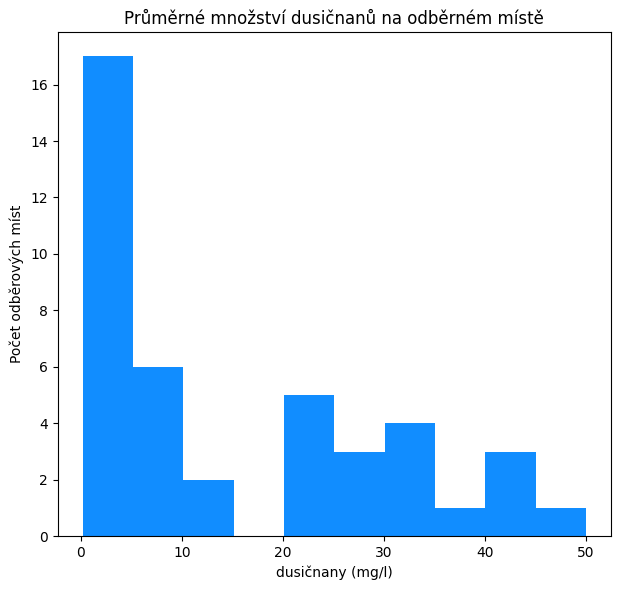

In [41]:

log_data = np.log10(average_values['Hodnota'])

plt.figure(figsize=(12, 6))  # Adjusting to fit a histogram better
plt.subplot(1,2,1)
plt.hist(average_values['Hodnota'], bins=10, color='#118dff')
plt.title('Průměrné množství dusičnanů na odběrném místě')
plt.xlabel('dusičnany (mg/l)')
plt.ylabel('Počet odběrových míst')
plt.tight_layout()
plt.show()